In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Import the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # used for init the ANN model
from tensorflow.keras.layers import Dense, Dropout # used for different layer structure

___
# Data Collection and Exploration
## Load the dataset

In [6]:
# Load the dataset
flood_df = pd.read_csv('_MalaysiaFloodDataset_MalaysiaFloodDataset.csv')
flood_df.rename(columns={'0V': 'NOV'}, inplace=True)
flood_df.rename(columns={'FLOOD ': 'FLOOD'}, inplace=True)
flood_df.drop(columns = ['STATE','DISTRICT','YEAR'], inplace= True )

In [7]:
flood_df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOOD
0,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19,0
1,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50,1
2,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70,1
3,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77,1
4,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39,1


## Explore the dataset

In [8]:
flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JAN              825 non-null    float64
 1   FEB              825 non-null    float64
 2   MAR              825 non-null    float64
 3   APR              825 non-null    float64
 4   MAY              825 non-null    float64
 5   JUN              825 non-null    float64
 6   JUL              825 non-null    float64
 7   AUG              825 non-null    float64
 8   SEP              825 non-null    float64
 9   OCT              825 non-null    float64
 10  NOV              825 non-null    float64
 11  DEC              825 non-null    float64
 12  ANNUAL RAINFALL  825 non-null    float64
 13  FLOOD            825 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 90.4 KB


In [9]:
M = flood_df.shape[0]

print('Number of samples =', M)

Number of samples = 825


In [10]:
# Cheak if any colomns is left empty
flood_df.isnull().sum()

JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOOD              0
dtype: int64

In [11]:
flood_df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOOD
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,234.117527,146.523309,190.234715,195.297673,185.783952,184.996194,198.949261,203.721261,228.316667,301.028303,319.190570,318.813867,2706.973358,0.420606
std,174.996518,120.125859,84.469198,82.442372,73.098666,82.356570,73.642059,64.378187,77.334859,107.027786,130.187797,150.610271,558.700699,0.493956
min,3.650000,3.010000,22.580000,29.540000,67.610000,54.510000,73.030000,83.250000,81.350000,48.700000,92.450000,54.120000,1686.500000,0.000000
25%,99.010000,51.540000,125.690000,133.220000,128.780000,121.830000,153.200000,158.910000,174.520000,230.710000,227.720000,207.800000,2308.590000,0.000000
50%,193.950000,121.380000,185.450000,193.010000,171.510000,171.980000,183.740000,195.780000,211.870000,285.760000,299.790000,276.930000,2580.060000,0.000000
75%,308.690000,205.300000,239.090000,246.010000,231.200000,223.890000,228.080000,234.800000,265.890000,351.920000,370.360000,412.450000,3022.760000,1.000000
max,1103.880000,614.670000,476.170000,431.920000,411.290000,460.610000,576.850000,475.360000,746.540000,682.070000,1006.350000,789.410000,4900.470000,1.000000


In [12]:
num_pos = flood_df['FLOOD'].value_counts()[1]
num_neg = flood_df['FLOOD'].value_counts()[0]

print('Number of flood: ', num_pos)
print('Number of no flood:', num_neg)

Number of flood:  347
Number of no flood: 478


Text(0.5, 1.0, 'Flood Occurrence')

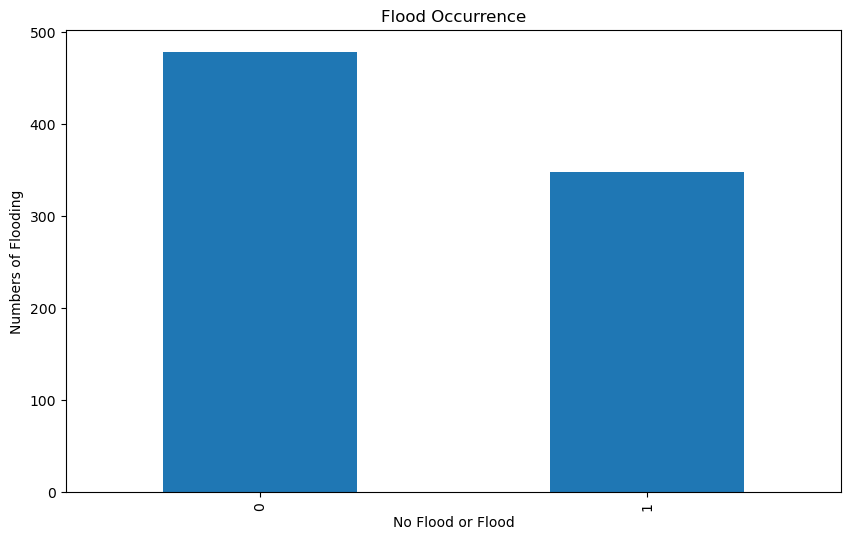

In [13]:
plt.figure(figsize=(10, 6))
flood_df['FLOOD'].value_counts().plot(kind='bar')
plt.xlabel('No Flood or Flood')
plt.ylabel('Numbers of Flooding')
plt.title("Flood Occurrence")

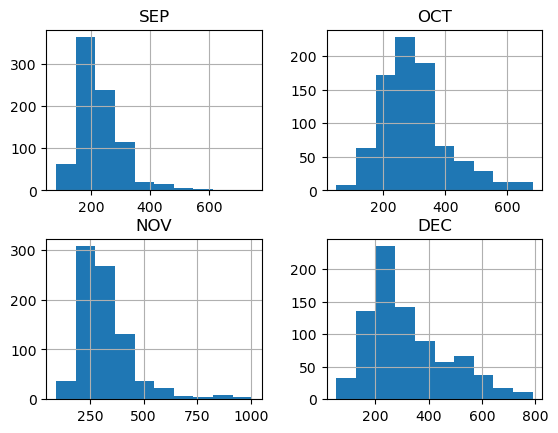

In [14]:
# Let's see how the rainfall index vary during rainy season (Sep - Nov, Nov - Jan)

%matplotlib inline
c = flood_df[['SEP','OCT','NOV','DEC']]
c.hist()
plt.show()

---
# Data preprocessing
## Split the dataset into training and testing set

In [15]:
X = flood_df.drop('FLOOD', axis=1)
y = flood_df['FLOOD']


print ('Shape of original dataset:', flood_df.shape)
print('Shape of X_df:', X.shape)
print('Shape of y_df:', y.shape)

Shape of original dataset: (825, 14)
Shape of X_df: (825, 13)
Shape of y_df: (825,)


In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (742, 13)
Shape of y_train: (742,)
Shape of X_test: (83, 13)
Shape of y_test: (83,)


In [17]:
print(X_test[:5])
print(y_test[:5])

        JAN     FEB     MAR     APR     MAY     JUN     JUL     AUG     SEP  \
611  338.09  216.72  151.03  221.84  382.48  445.17  292.82  227.84  476.69   
174  279.03  173.54  339.79  207.52  120.23  112.71  139.68  204.14  205.79   
67   186.43   18.50  189.69  185.57  148.93  149.56  170.67  201.38  208.25   
168  195.34  214.60  211.56  255.60  106.15  138.89  168.57  152.01  150.14   
275  231.12  142.74  177.16  188.06   88.42  144.45  203.78  246.16  207.76   

        OCT     NOV     DEC  ANNUAL RAINFALL  
611  412.89   92.45  221.52          3479.55  
174  232.85  318.36  384.48          2718.12  
67   352.30  196.86  179.36          2187.49  
168  387.29  352.78  255.46          2588.39  
275  230.71  271.39  293.68          2425.44  
611    1
174    1
67     0
168    1
275    0
Name: FLOOD, dtype: int64


In [18]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
print(scaler.mean_)
print(scaler.var_)

[ 234.46855795  143.84        189.6490027   194.10075472  185.84382749
  184.12814016  200.09545822  203.83150943  228.91012129  303.68787062
  317.4056469   320.23351752 2706.19455526]
[ 31655.47755655  14301.39292264   7094.54185426   7022.60326089
   5334.57776298   6756.81594128   5615.73950107   4269.5507298
   6124.67849985  11934.4639297   16191.53928307  23194.28061121
 318824.90069192]


---
# Training the model

In [20]:
# initializing the ANN model
FloodDetector = Sequential()

In [21]:
FloodDetector.add(Dense(32, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
FloodDetector.add(Dropout(rate=0.1))
FloodDetector.add(Dense(32, kernel_initializer='uniform', activation='relu'))
FloodDetector.add(Dropout(rate=0.1))
FloodDetector.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

c:\Users\Luqman Nurhakim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
FloodDetector.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
FloodDetector.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = FloodDetector.fit(X_train,y_train,batch_size=15,epochs=100,verbose=1,validation_split=0.1)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5802 - loss: 0.6899 - val_accuracy: 0.5733 - val_loss: 0.6865
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5802 - loss: 0.6785 - val_accuracy: 0.5733 - val_loss: 0.6728
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5802 - loss: 0.6678 - val_accuracy: 0.5733 - val_loss: 0.6654
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 0.6624 - val_accuracy: 0.5867 - val_loss: 0.6584
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6072 - loss: 0.6537 - val_accuracy: 0.6533 - val_loss: 0.6516
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6192 - loss: 0.6485 - val_accuracy: 0.6667 - val_loss: 0.6468
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6267 - loss: 0.6436 - val_accuracy: 0.6400 - val_loss: 0.6394
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6312 - loss: 0.6355 - val_accuracy: 0.6533 - 

---
# Evaluating the model

In [25]:
# predicting the test set result
y_pred = FloodDetector.predict(X_test)
y_pred = (y_pred>0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [26]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[33, 15],
       [16, 19]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test,y_pred))

Accuracy score: 0.6265060240963856


In [28]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_test,y_pred))

F1 score: 0.5507246376811594


In [29]:
from sklearn.metrics import precision_score
print('Precision:', precision_score(y_test,y_pred))

Precision: 0.5588235294117647


In [30]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test,y_pred))

Recall: 0.5428571428571428


In [31]:
accuracy = FloodDetector.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6265 - loss: 0.5818 
Accuracy: 0.6265060305595398


In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training acc', 'Validation acc'])

---
# Test the model

In [34]:
example_data = X_test[0].reshape(1, -1)
prediction = FloodDetector.predict(example_data)[0][0]

if prediction >= 0.5:
    print("The model predicts that a flood occurred.")
else:
    print("The model predicts that no flood occurred.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The model predicts that a flood occurred.


In [35]:
example_data = X_test[1].reshape(1, -1)
prediction = FloodDetector.predict(example_data)[0][0]

if prediction >= 0.5:
    print("The model predicts that a flood occurred.")
else:
    print("The model predicts that no flood occurred.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The model predicts that a flood occurred.


In [36]:
example_data = X_test[2].reshape(1, -1)
prediction = FloodDetector.predict(example_data)[0][0]

if prediction >= 0.5:
    print("The model predicts that a flood occurred.")
else:
    print("The model predicts that no flood occurred.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The model predicts that a flood occurred.


In [37]:
example_data = X_test[3].reshape(1, -1)
prediction = FloodDetector.predict(example_data)[0][0]

if prediction >= 0.5:
    print("The model predicts that a flood occurred.")
else:
    print("The model predicts that no flood occurred.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The model predicts that a flood occurred.


In [38]:
example_data = X_test[4].reshape(1, -1)
prediction = FloodDetector.predict(example_data)[0][0]

if prediction >= 0.5:
    print("The model predicts that a flood occurred.")
else:
    print("The model predicts that no flood occurred.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
The model predicts that no flood occurred.


---
# Save the model

In [46]:
FloodDetector.save('flood_detector.keras')

In [47]:
# Convert the model to TensorFlow Lite format
model = tensorflow.keras.models.load_model('flood_detector.keras')
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('flood_detector.tflite', 'wb') as f:
    f.write(tflite_model)

c:\Users\Luqman Nurhakim\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


INFO:tensorflow:Assets written to: C:\Users\LUQMAN~1\AppData\Local\Temp\tmphn_dkp2x\assets


INFO:tensorflow:Assets written to: C:\Users\LUQMAN~1\AppData\Local\Temp\tmphn_dkp2x\assets


Saved artifact at 'C:\Users\LUQMAN~1\AppData\Local\Temp\tmphn_dkp2x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1418553843088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418553844624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418553842896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418553844816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418553843664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418553845584: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [41]:
xnew = np.array([[231.12,142.74,177.16,188.06,88.42,144.45,203.78,246.16,207.76,230.71,271.39,293.68,2425.44]])
xnew = scaler.transform(xnew)
ynew = FloodDetector.predict(xnew)
#invert normalize
xnew = scaler.inverse_transform(xnew)
print("X=%s, Predicted=%s" % (xnew[0], ynew[0][0]))

c:\Users\Luqman Nurhakim\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
X=[ 231.12  142.74  177.16  188.06   88.42  144.45  203.78  246.16  207.76
  230.71  271.39  293.68 2425.44], Predicted=0.15453328
